In [2]:
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath

from options import *
from constants import *

nom_vals = unp.nominal_values
std_devs = unp.std_devs

mpl.rcParams.update(rcParams)

In [45]:
lowmean = np.loadtxt('../data/stat_lowmean3ms.TKA')
lowmean

array([ 0., 12.,  5., ...,  0.,  2.,  0.])

In [46]:
np.mean(lowmean)

np.float64(2.27001953125)

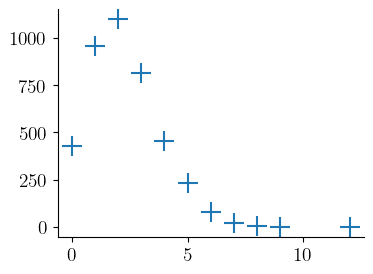

In [62]:
values, counts = np.unique_counts(lowmean)
plt.scatter(values, counts)
# plt.hist(dataz, bins=range(len(values)+2), align='mid')

In [ ]:
highmean = np.loadtxt('../data/stat_highmean1s.TKA')
lowmean

array([ 0., 12.,  5., ...,  0.,  2.,  0.])

In [ ]:
np.mean(lowmean)

np.float64(2.27001953125)

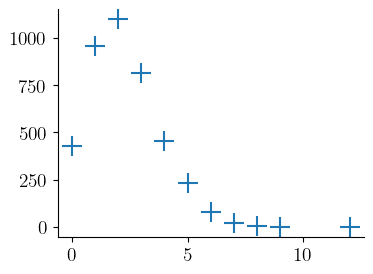

In [ ]:
values, counts = np.unique_counts(lowmean)
plt.scatter(values, counts)
# plt.hist(dataz, bins=range(len(values)+2), align='mid')